In [128]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

In [3]:
import os
import PIL
import cv2

In [35]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower',untar=True,cache_dir='.',origin=dataset,)


In [36]:
data_dir #path changed somehow...(?)

'./datasets/flower'

In [37]:
import pathlib

In [42]:
data_dir = pathlib.Path('Datasets/flower_photos/')
data_dir

PosixPath('Datasets/flower_photos')

In [44]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('Datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('Datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('Datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('Datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('Datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

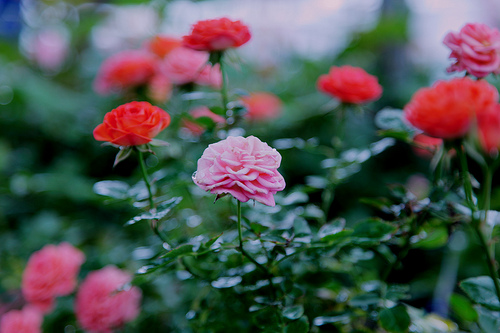

In [45]:
PIL.Image.open(roses[1])

In [48]:
flower_dic = {
    'roses' :list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelions': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*')),
}

In [51]:
flower_label={
    'roses':0,
    'tulips':1,
    'dandelions':2,
    'sunflower':3,
    'daisy':4,
}

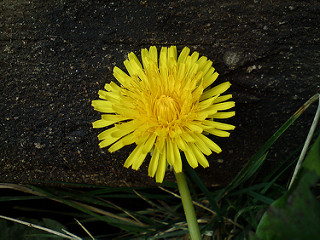

In [55]:
PIL.Image.open(flower_dic['dandelions'][0])

In [60]:
# stringify path
path_rose0 = str(flower_dic['roses'][0])

PosixPath('Datasets/flower_photos/roses/16209331331_343c899d38.jpg')

In [62]:
#using opencv
img = cv2.imread(path_rose0)
img.shape

(243, 500, 3)

In [63]:
#resize
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [65]:
#for all the images
X,y=[],[]

for name,images in flower_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img= cv2.resize(img,(180,180))
        X.append(re_img)
        y.append(flower_label[name])

In [71]:
X = np.array(X)
y=np.array(y)
X=X/255

In [72]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size =0.2)

In [87]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16,3, padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(), 
    keras.layers.Conv2D(64,3, padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(120,activation = 'relu'),
     keras.layers.Dense(120,activation = 'relu'),
    keras.layers.Dense(5)
])

In [88]:
cnn.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [89]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
92/92 [==============================] - 10s 108ms/step - loss: 1.4977 - accuracy: 0.3201
Epoch 2/10
92/92 [==============================] - 10s 110ms/step - loss: 1.0451 - accuracy: 0.5838
Epoch 3/10
92/92 [==============================] - 10s 109ms/step - loss: 0.8603 - accuracy: 0.6734
Epoch 4/10
92/92 [==============================] - 10s 110ms/s

In [90]:
cnn.evaluate(X_test,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 1s 31ms/step - loss: 1.7045 - accuracy: 0.6567


[1.7044847011566162, 0.6566757559776306]

## Data Augumentation

In [118]:
data_augumentation = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    
])


In [123]:
cnn1 = keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(16,(3,3), padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,(3,3), padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(), 
    keras.layers.Conv2D(64,(3,3), padding ='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(120,activation = 'relu'),
     keras.layers.Dense(120,activation = 'relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [124]:
cnn1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [125]:
cnn1.fit(X_train,y_train,epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
92/92 [==============================] - 12s 121ms/step - loss: 1.5697 - accuracy: 0.2935
Epoch 2/10
92/92 [==============================] - 11s 120ms/step - loss: 1.0690 - accuracy: 0.5731
Epoch 3/10
92/92 [==============================] - 11s 115ms/step - loss: 0.9388 - accuracy: 0.6315
Epoch 4/10
92/92 [==============================] - 11s 125ms/s

In [126]:
cnn1.evaluate(X_test,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 1s 32ms/step - loss: 0.9625 - accuracy: 0.6635


[0.9624975323677063, 0.6634877324104309]